In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve



In [7]:
data = pd.read_csv('heart_disease_uci.csv')
data.head()




,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
for col in data.columns:
    if data[col].dtype == 'object':  
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:  
        data[col].fillna(data[col].median(), inplace=True)

missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


output_file_name = 'preprocessed_heart_disease_data.csv'

data.to_csv(output_file_name, index=False)


Series([], dtype: int64)


In [4]:
patient_variable_matrix = data.drop(['num', 'id'], axis=1)
target_vector = data['num']
patient_variable_matrix.head(), target_vector.head()

categorical_columns = data.select_dtypes(include=['object', 'bool']).columns

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

joblib.dump(label_encoders, 'label_encoders.joblib')

patient_variable_matrix = data.drop(['num', 'id'], axis=1)
target_vector = data['num']


data.to_csv('encoded_dataset.csv', index=False)

data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(patient_variable_matrix, target_vector, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [7]:
print(f'Training Accuracy: {model.score(X_train, y_train)}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'AUC Score: {roc_auc_score(y_test, y_prob)}')

Training Accuracy: 1.0
Test Accuracy: 0.5869565217391305


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

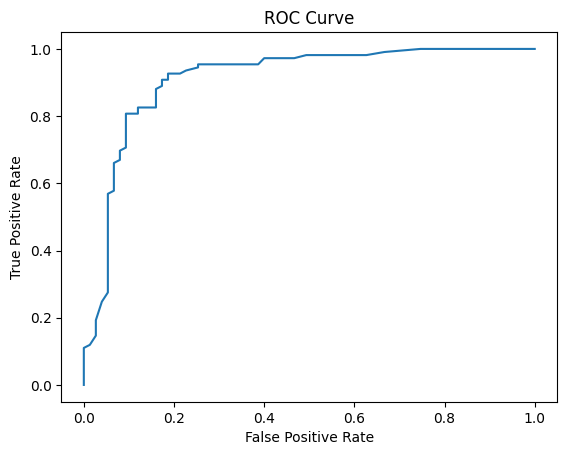

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()